In [608]:
import numpy as np

from data.california_house import get_california_housing_dataset
from data.penguin import get_penguins_dataset
from linear_regression_experiements.data.adult import get_adult_dataset
from linear_regression_experiements.data.mnist import get_mnist
from utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [609]:
def get_dataset(dataset: str) -> Tuple[List[np.ndarray], List[np.ndarray], List[np.ndarray], List[np.ndarray]]:
    if dataset == 'penguins':
        return get_penguins_dataset()
    elif dataset == 'california_house':
        return get_california_housing_dataset()
    elif dataset == 'adult':
        return get_adult_dataset()
    elif dataset == "mnist":
        return get_mnist()
    else:
        del Xs_train, Xs_test, ys_train, ys_test
        raise NotImplementedError(f'Dataset {dataset} not implemented')


Xs_train, Xs_test, ys_train, ys_test = get_dataset("adult")
print(f"There is {len(Xs_train)} clients and {Xs_train[0].shape[1]} features")
print(f"Number of training samples: {list(map(lambda x: x.shape[0], Xs_train))}")
print(f"Number of test samples: {list(map(lambda x: x.shape[0], Xs_test))}")

There is 5 clients and 13 features
Number of training samples: [286, 895, 2817, 231, 25933]
Number of test samples: [149, 408, 1411, 122, 12970]


In [610]:
betas_local, std_squared, sizes = train(Xs_train, ys_train)
Ws = OLS_iterative_fusion(betas_local, std_squared, num_iter=10)
betas_fusion = get_fusion_betas(betas_local, Ws)
betas_fair_fusion, C = get_fair_fusion_betas(betas_local, Ws, std_squared, sizes)
mse_local = get_mse(Xs_test, ys_test, betas_local)
mse_fusion = get_mse(Xs_test, ys_test, betas_fusion)
mse_fair_fusion_mean, mse_fair_fusion_var = get_expected_fair_mse(betas_local, Ws, std_squared, sizes, Xs_test, ys_test)

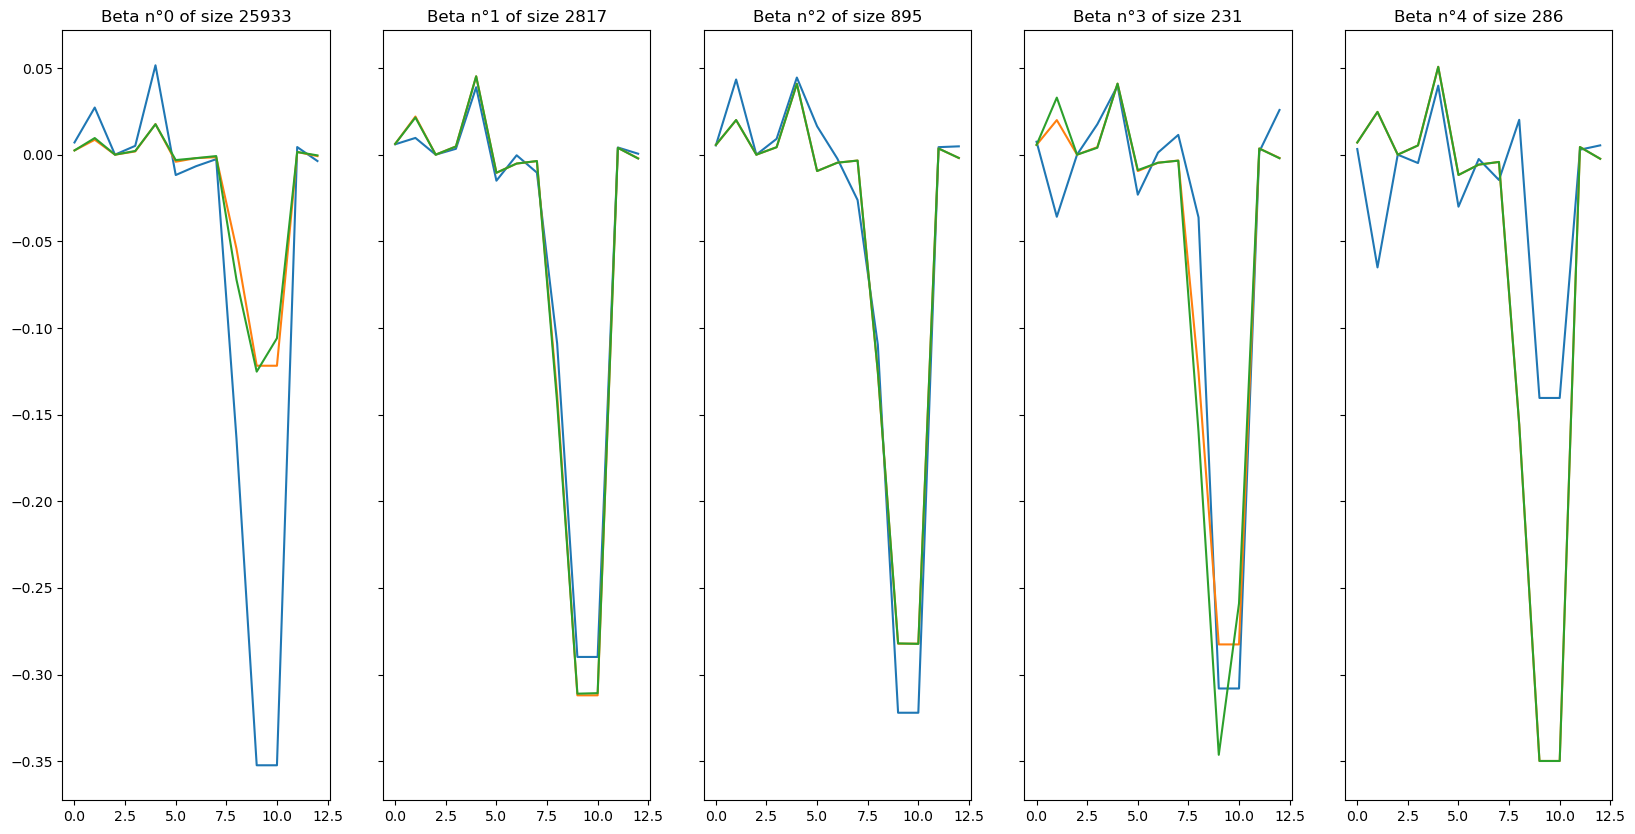

In [611]:
plot_betas(betas_local, betas_fusion, betas_fair_fusion, std_squared, sizes)

In [612]:
print(C)

[0.14593323 0.         0.13682729 0.00747553 1.        ]


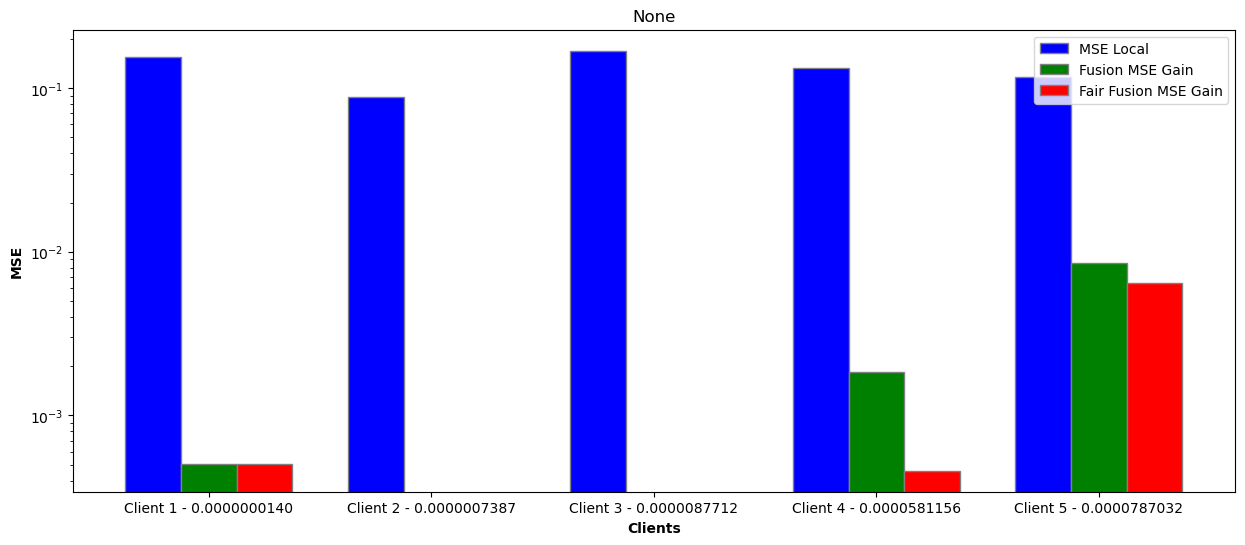

In [613]:
plot_mse_local_fusion_fair(mse_local, mse_local - mse_fusion, mse_local - mse_fair_fusion_mean, std_squared, sizes)